In [1]:
# Exploratory Data Analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

# Used to create UI
from ipywidgets import widgets

# Import and clean data

In [2]:
# Import data
tumor_df = pd.read_csv('cancer_cell_data.csv', index_col=False)

# Change target values to numerical form
tumor_df['diagnosis'] = tumor_df['diagnosis'].replace({'M': 1, 'B': 0})

# Drop empty column from dataset
tumor_df = tumor_df.drop(['Unnamed: 32', 'id'], axis=1)

tumor_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
tumor_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Use bar graphs, histograms, and correlation matrix to visualize the data
* Bar graph shows the distribution for the target variable
* Histograms show distribution of feature variables
* correlation matrix shows correlations between all variables

<Axes: >

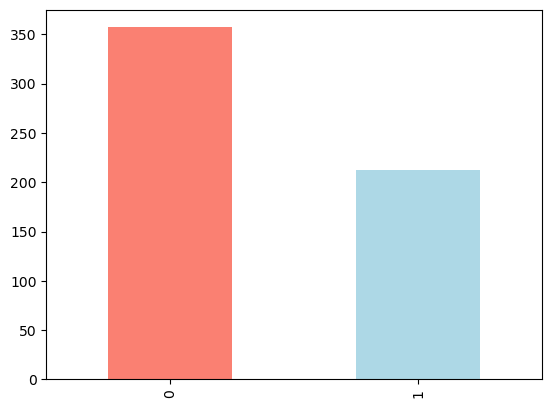

In [4]:
# Check value counts for target variable
tumor_df.diagnosis.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [5]:
# Create new dataframe without 'diagnosis' column to see distribution of features
tumor_no_diagnosis = tumor_df.drop('diagnosis', axis=1)

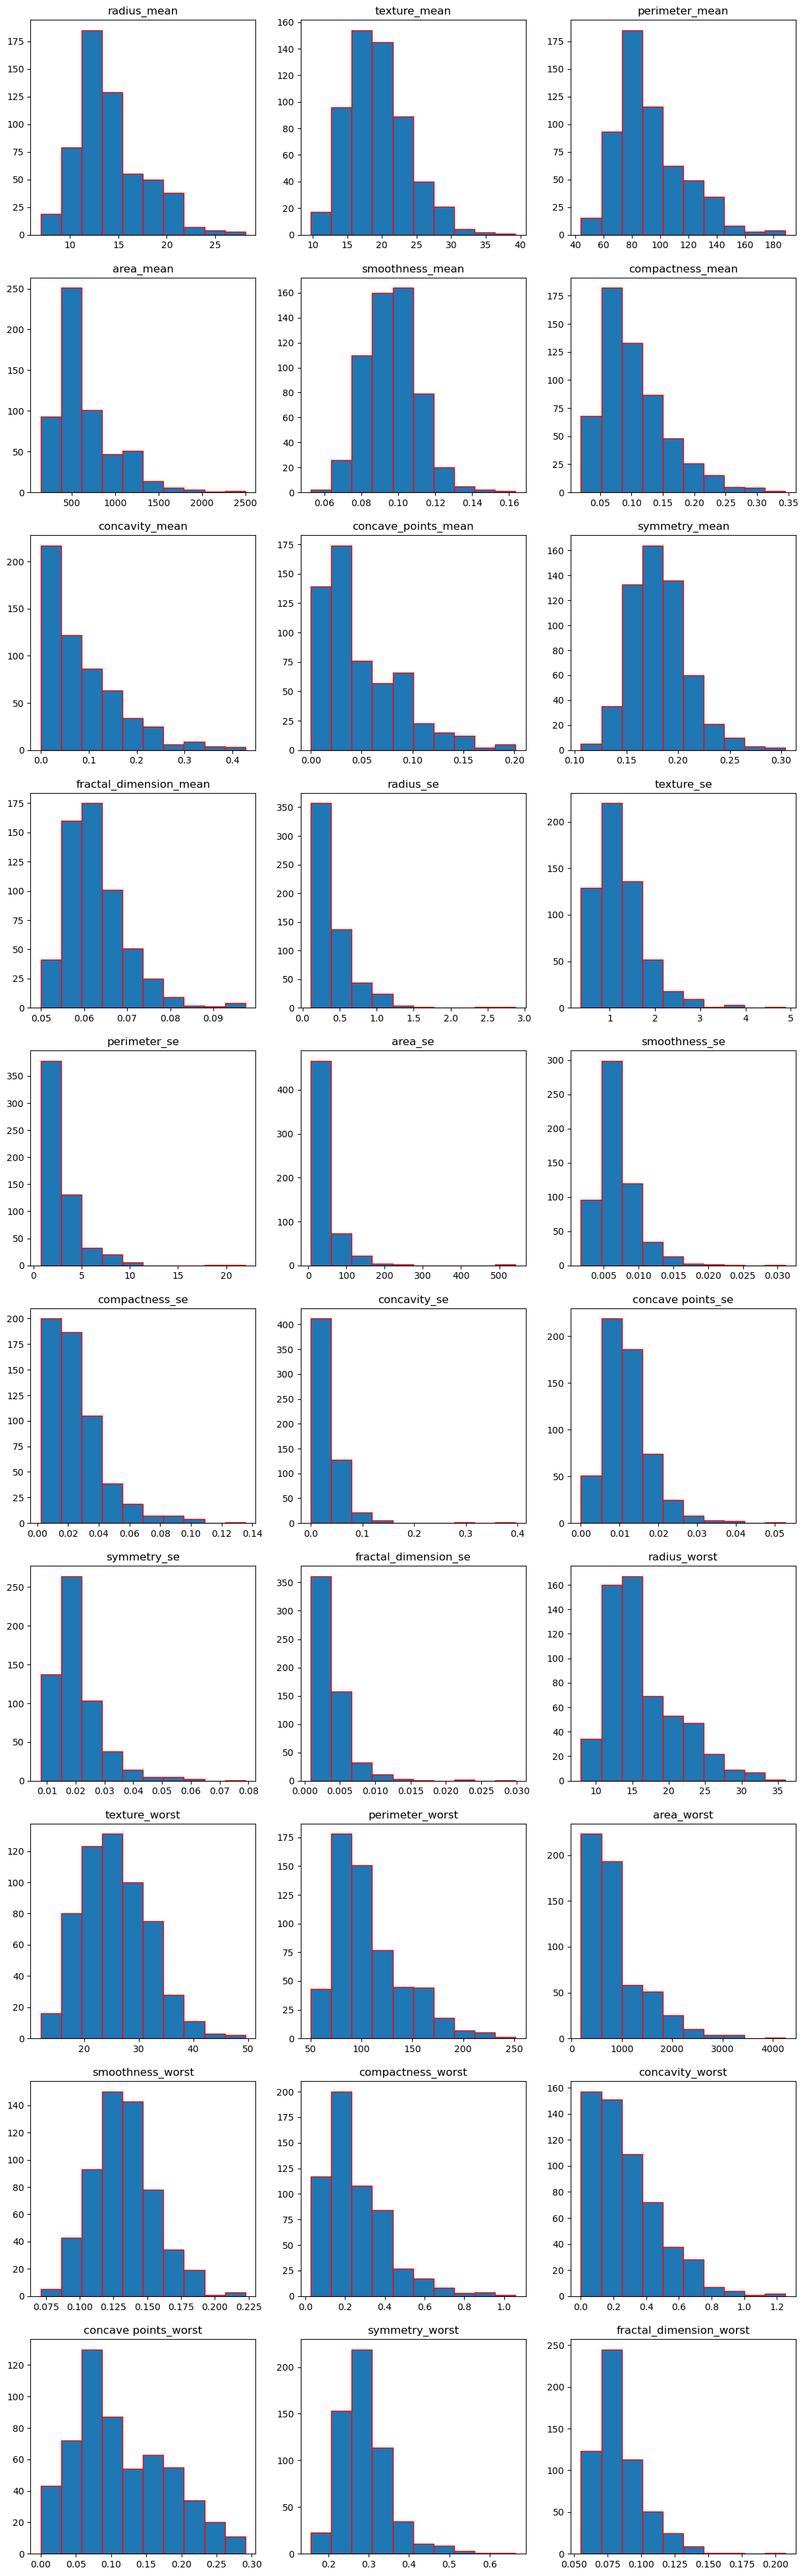

In [6]:
# Get the number of columns in dataframe
num_cols = len(tumor_no_diagnosis.columns)

# Calculate the number of rows for the grid
num_rows = (num_cols - 1) // 3 + 1

# Create subplots to show the distribution of our features
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Iterate over the columns in the dataframe and create a histogram for each column
for i, col in enumerate(tumor_no_diagnosis.columns):  
    ax = axs[i//3, i%3]
    ax.hist(tumor_no_diagnosis[col], bins=10, edgecolor='red')
    ax.set_title(col)

# Remove any empty subplots
for i in range(num_rows * 3 - num_cols):
    fig.delaxes(axs[num_rows - 1, num_cols % 3 + i])

# Display subplots
plt.show()

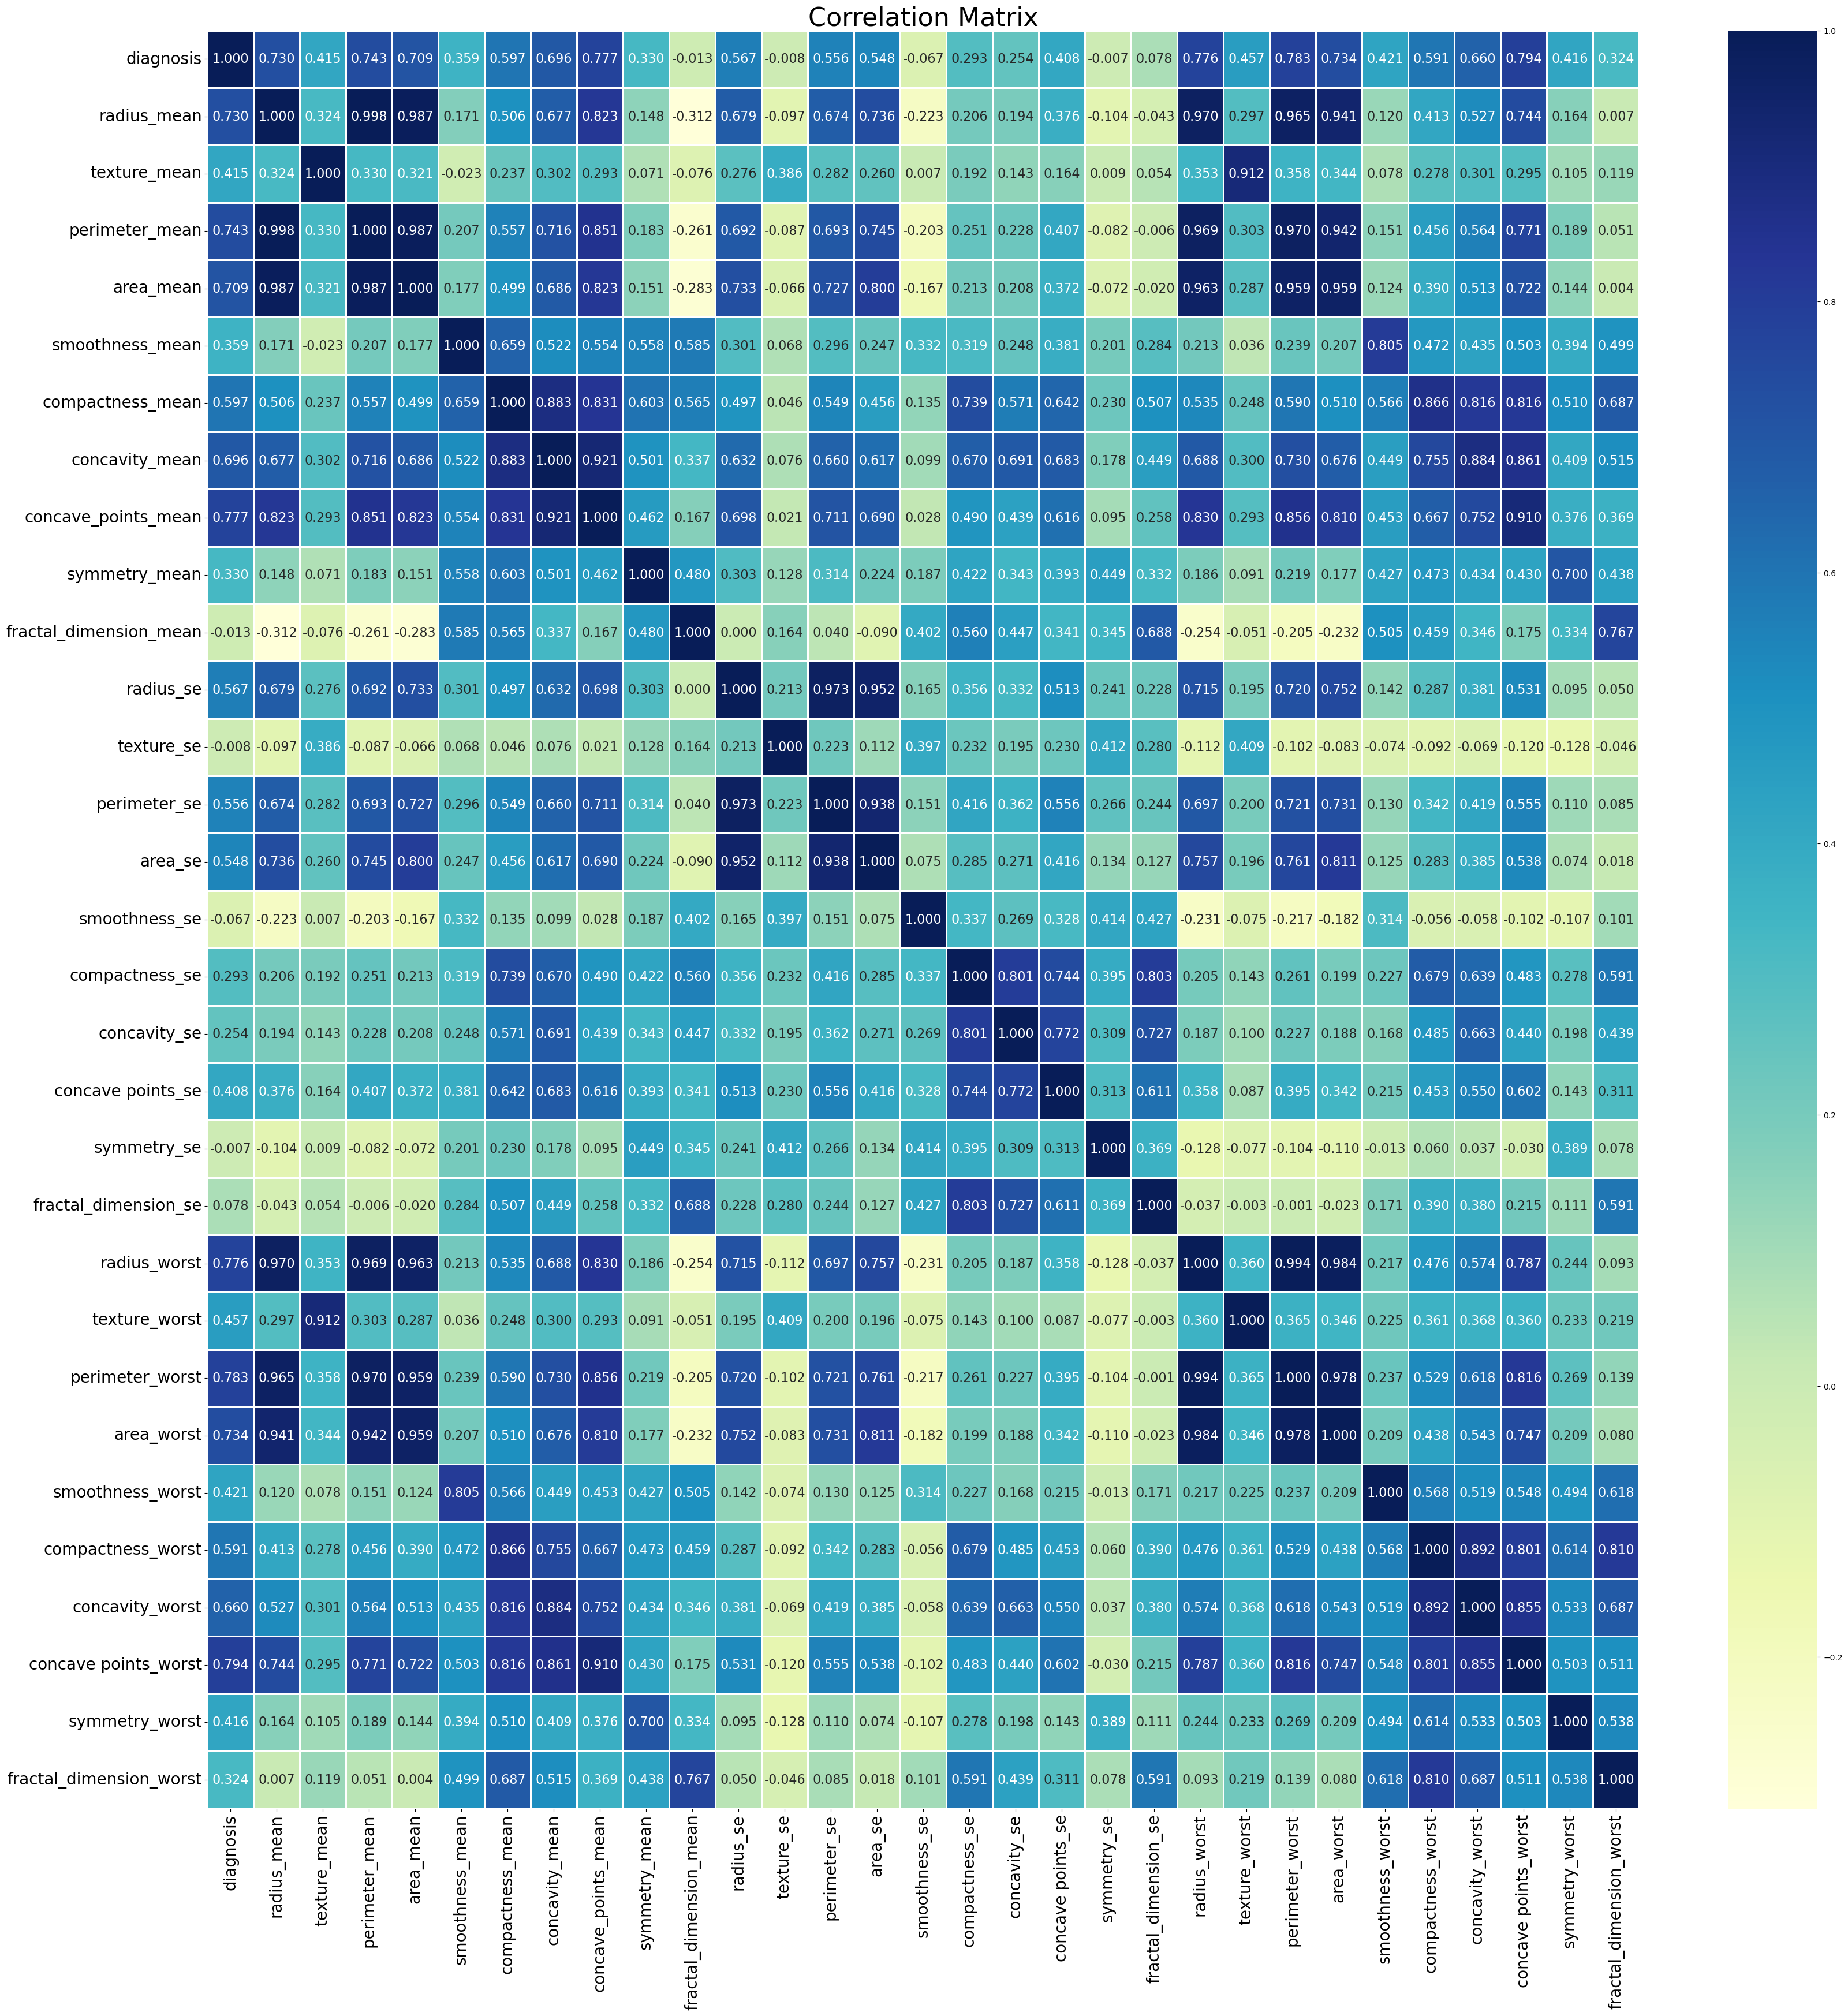

In [7]:
# Calculate correlation matrix
corr_matrix = tumor_df.corr()

# Setup figure
fig, ax = plt.subplots(figsize=(40, 40))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='YlGnBu', fmt='.3f', annot_kws={'fontsize': 16})

# Adjust size of x and y ticks and set title
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Correlation Matrix', {'fontsize': 32})

# Display heatmap
plt.show()

## Train and test baseline models

In [8]:
# Store features
X = tumor_df.drop('diagnosis', axis=1)

# Store targets
y = tumor_df['diagnosis']

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train 6 different models and observe which one does the best to predict wether a tumor is malignant or benign

In [10]:
# Put models in a dictionary
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(max_iter=1000),
          'Random Forest': RandomForestClassifier(),
          'Linear SVC': LinearSVC(),
          'Gradient boosting': GradientBoostingClassifier(),
          'Decision tree': DecisionTreeClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    
    Parameters:
    models (dict): a dict of different Scikit-Learn machine learning models
    X_train (array): training data
    X_test (array): testing data
    y_train (array): labels assosciated with training data
    y_test (array): labels associated with test data
    """
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [11]:
# Store each models baseline scores
model_baseline_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

# Display each models baseline scores
model_baseline_scores

C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'KNN': 0.956140350877193,
 'Logistic Regression': 0.9649122807017544,
 'Random Forest': 0.9649122807017544,
 'Linear SVC': 0.9298245614035088,
 'Gradient boosting': 0.956140350877193,
 'Decision tree': 0.9385964912280702}

## Tune hyperparameters
* First use RandomizedSearchCV do get an idea of what hyperparameter values cause the model to perform the best
* Using the knowledge of what hyperparameters worked best from RandomizedSearchCV, tune the hyperparameters further using GridSearchCV

In [12]:
# Create function for hyperparameter tuning using RandomizedSearchCV
def tune_hyper_params_randomized(models, params, X_train, y_train):
    """
    This function takes a dictionary of models and a dictionary of parameter distributions, 
    and performs RandomizedSearchCV to find the best hyperparameters for each model.
    
    Parameters:
    models (dict): A dictionary with model names as keys and model instances as values.
    params (dict): A dictionary with model names as keys and parameter distributions as values.
    X (array-like): The feature matrix.
    y (array-like): The target variable.

    Returns:
    dict: A dictionary with model names as keys and the best hyperparameters as values.
    """
    model_scores = {}
    best_params = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for model_name in models:
        model = models[model_name]
        param_dist = params[model_name]
        
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', n_iter=100, cv=skf, verbose=1, n_jobs=-1)
        random_search.fit(X_train, y_train)
        
        # Store the models best accuracy store in dict
        model_scores[model_name] = random_search.best_score_
        
        # Store the models best hyperparameters in dict
        best_params[model_name] = random_search.best_params_
        
        # Display models best score and best hyperparameters
        print(f"Best parameters for {model_name}: {best_params[model_name]}")
        print(f"Best score for {model_name}: {model_scores[model_name]}\n")
        
    return model_scores, best_params

In [13]:
# Create params dictionary for RandomizedSearchCV
params = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500, 1000],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Linear SVC': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'loss': ['hinged', 'squared_hinge']
    },
    'Gradient boosting': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Decision tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Call function to store best scores and hyperparameters using RandomizedSearchCV
model_randomized_scores, best_randomized_params = tune_hyper_params_randomized(models, params, X_train, y_train)

C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Best score for KNN: 0.9340659340659341

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.001}
Best score for Logistic Regression: 0.9670329670329669

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
Best score for Random Forest: 0.9626373626373628

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Linear SVC: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.001}
Best score for Linear SVC: 0.9186813186813186

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train,

Best parameters for Gradient boosting: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.3}
Best score for Gradient boosting: 0.9736263736263737

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Decision tree: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'entropy'}
Best score for Decision tree: 0.9406593406593406



Display baseline scores then the best scores from RandomizedSearchCV and compare them.

In [14]:
model_baseline_scores

{'KNN': 0.956140350877193,
 'Logistic Regression': 0.9649122807017544,
 'Random Forest': 0.9649122807017544,
 'Linear SVC': 0.9298245614035088,
 'Gradient boosting': 0.956140350877193,
 'Decision tree': 0.9385964912280702}

In [15]:
model_randomized_scores

{'KNN': 0.9340659340659341,
 'Logistic Regression': 0.9670329670329669,
 'Random Forest': 0.9626373626373628,
 'Linear SVC': 0.9186813186813186,
 'Gradient boosting': 0.9736263736263737,
 'Decision tree': 0.9406593406593406}

In [16]:
# Create function for hyperparameter tuning using GridSearchCV
def tune_hyper_params_grid(models, params, X_train, y_train):
    """
    This function takes a dictionary of models and a dictionary of parameter grids, 
    and performs GridSearchCV to find the best hyperparameters for each model.
    
    Parameters:
    models (dict): A dictionary with model names as keys and model instances as values.
    params (dict): A dictionary with model names as keys and parameter grids as values.
    X_train (array-like): The feature matrix.
    y_train (array-like): The target variable.
    cv (int): The number of cross-validation folds.
    scoring (str): The scoring metric to use.
    verbose (int): Controls verbosity of the output.
    n_jobs (int): The number of CPUs to use.

    Returns:
    dict: A dictionary with model names as keys and the best scores as values.
    dict: A dictionary with model names as keys and the best hyperparameters as values.
    """
    # Create dictionaries to hold model scores and best hyperparameters
    model_scores = {}
    best_params = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Create loop to search for best hyperparameters for each model
    for model_name in models:
        model = models[model_name]
        param_grid = params[model_name]
        
        # Use GridSearchCV to search for best hyperparameters
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=skf, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Store best scores and hyperparameters in dictionaries
        model_scores[model_name] = grid_search.best_score_
        best_params[model_name] = grid_search.best_params_
        
        # Display best parameters and scores for each model
        print(f"Best parameters for {model_name}: {best_params[model_name]}")
        print(f"Best score for {model_name}: {grid_search.best_score_}\n")
    
    return model_scores, best_params

Display best hyperparameters found from RandomizedSearchCV and use this information to create better example hyperparameter values for GridSearchCV

In [17]:
best_randomized_params

{'KNN': {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'},
 'Logistic Regression': {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.001},
 'Random Forest': {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_depth': 30},
 'Linear SVC': {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.001},
 'Gradient boosting': {'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 4,
  'max_depth': 3,
  'learning_rate': 0.3},
 'Decision tree': {'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_depth': 30,
  'criterion': 'entropy'}}

In [18]:
# Create params dictionary for GridSearchCV
params = {
    'KNN': {
        'n_neighbors': [5, 6, 7, 8, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Logistic Regression': {
        'C': [70, 90, 100, 120, 150],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'Random Forest': {
        'n_estimators': [200, 400, 500, 650],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [1.0, 2, 3, 4],
        'min_samples_leaf': [1, 2, 3]
    },
    'Linear SVC': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'loss': ['hinged', 'squared_hinge']
    },
    'Gradient boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.4],
        'max_depth': [4, 5, 6],
        'min_samples_split': [1, 2, 3, 4],
        'min_samples_leaf': [3, 4, 5]
    },
    'Decision tree': {
        'criterion': ['gini', 'entropy', "log_loss"],
        'max_depth': [15, 20, 25, None],
        'min_samples_split': [1.0, 2, 3, 4],
        'min_samples_leaf': [3, 4, 5]
    }
}

# Call function to store best scores and hyperparameters using GridSearchCV
model_grid_scores, best_params = tune_hyper_params_grid(models, params, X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score for KNN: 0.9340659340659341

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best parameters for Logistic Regression: {'C': 70, 'penalty': 'none', 'solver': 'newton-cg'}
Best score for Logistic Regression: 0.9670329670329669

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score for Random Forest: 0.9626373626373628

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Linear SVC: {'C': 100, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best score for Linear SVC: 0.9252747252747253

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\svm\_classes.py", line 261, in fit
    self._validate_params()
  File "C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\base.py", line 6

Best parameters for Gradient boosting: {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Gradient boosting: 0.9736263736263737

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Decision tree: {'criterion': 'log_loss', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best score for Decision tree: 0.9406593406593406



Display the best scores from RandomizedSearchCV, GridSearchCV, and baseline scores and see which models performed the best

In [19]:
model_grid_scores

{'KNN': 0.9340659340659341,
 'Logistic Regression': 0.9670329670329669,
 'Random Forest': 0.9626373626373628,
 'Linear SVC': 0.9252747252747253,
 'Gradient boosting': 0.9736263736263737,
 'Decision tree': 0.9406593406593406}

In [20]:
model_randomized_scores

{'KNN': 0.9340659340659341,
 'Logistic Regression': 0.9670329670329669,
 'Random Forest': 0.9626373626373628,
 'Linear SVC': 0.9186813186813186,
 'Gradient boosting': 0.9736263736263737,
 'Decision tree': 0.9406593406593406}

In [21]:
model_baseline_scores

{'KNN': 0.956140350877193,
 'Logistic Regression': 0.9649122807017544,
 'Random Forest': 0.9649122807017544,
 'Linear SVC': 0.9298245614035088,
 'Gradient boosting': 0.956140350877193,
 'Decision tree': 0.9385964912280702}

## Evaluate best performing model
* Gradient Boosting had the highest accuracy score so we will train a Gradient Boosting model with the best hyperparameters from GridSearchCV and evaluate the models performance

In [22]:
# Display best hyperparameters from GridSearchCV
best_params

{'KNN': {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'},
 'Logistic Regression': {'C': 70, 'penalty': 'none', 'solver': 'newton-cg'},
 'Random Forest': {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 400},
 'Linear SVC': {'C': 100, 'loss': 'squared_hinge', 'penalty': 'l2'},
 'Gradient boosting': {'learning_rate': 0.2,
  'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Decision tree': {'criterion': 'log_loss',
  'max_depth': 15,
  'min_samples_leaf': 4,
  'min_samples_split': 3}}

In [23]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=best_params['Gradient boosting']['n_estimators'],
                                      learning_rate=best_params['Gradient boosting']['learning_rate'],
                                      max_depth=best_params['Gradient boosting']['max_depth'],
                                      min_samples_leaf=best_params['Gradient boosting']['min_samples_leaf'],
                                      min_samples_split=best_params['Gradient boosting']['min_samples_split'])

# Train the model using training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Store true values from test data
y_true = y_test

In [24]:
# Store and display evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1-score: 0.9411764705882352
Confusion Matrix:
 [[69  2]
 [ 3 40]]


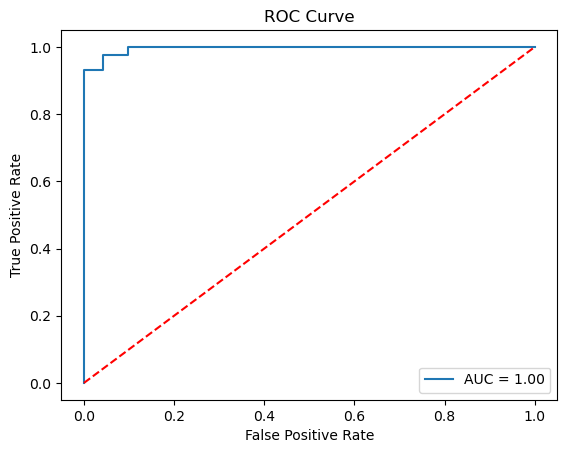

In [25]:
# ROC curve and AUC
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()

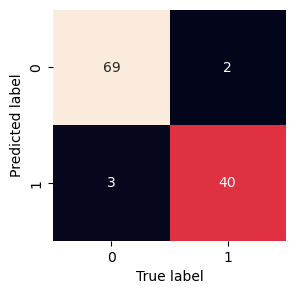

In [26]:
# Create function to plot a confusion matrix
def plot_conf_mat(y_test, y_pred):
    """
    Plots confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_pred)

In [27]:
# Create and display a classification report for the gradient boosting model
gb_classification_report = classification_report(y_test, y_pred)
print(gb_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# It appears that gradient boosting is performing well but lets try a Logistic Regression model, since it also had high accuracy scores, to see if this model can perform better 

In [28]:
# Initialize the Logistic Regression model using best hyperparameters from GridSearchCV
lr_model = LogisticRegression(C=best_params['Logistic Regression']['C'],
                              penalty=best_params['Logistic Regression']['penalty'],
                              solver=best_params['Logistic Regression']['solver'])

# Train the model using training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Store true values from test data
y_true = y_test

C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dakot\Anacondaprojects\capstone_project\env\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [29]:
# Store and display evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1-score: 0.9767441860465116


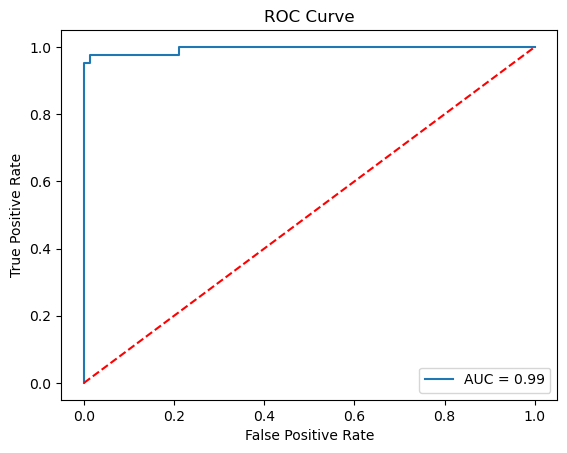

In [30]:
# ROC curve and AUC
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()

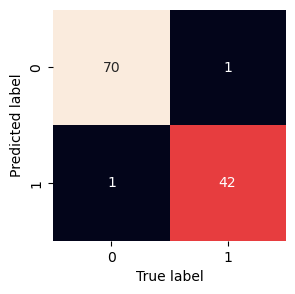

In [31]:
# Create confusion matrix for Logistic Regression model
plot_conf_mat(y_test, y_pred)

In [32]:
# Create and display classification report for Logistic Regression model
lr_classification_report = classification_report(y_test, y_pred)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [33]:
# Display Gradient Boosting classification report
print(gb_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# After evaluating and comparing the two model's performance it appears Logistic Regression is performing the best so we will use this model as our final predictor. The user can now enter values for all 30 features and click the predict button to see whether the model predicts the given tumor as malignant or benign

In [34]:
# The text boxes where the user can input values.
radius_widget = widgets.FloatText(description='radius mean:', value='0')
texture_widget = widgets.FloatText(description='texture mean:', value='0')
perimeter_widget = widgets.FloatText(description='perimeter mean:', value='0')
perimeter_widget.style.description_width='100px'
area_widget = widgets.FloatText(description='area mean:', value='0')
smoothness_widget = widgets.FloatText(description='smoothness mean:', value='0')
smoothness_widget.style.description_width='110px'
compactness_widget = widgets.FloatText(description='compactness mean:', value='0')
compactness_widget.style.description_width='120px'
concavity_widget = widgets.FloatText(description='concavity mean:', value='0')
concavity_widget.style.description_width='100px'
concave_points_widget = widgets.FloatText(description='concave points mean:', value='0')
concave_points_widget.style.description_width='130px'
symmetry_widget = widgets.FloatText(description='symmetry mean:', value='0')
symmetry_widget.style.description_width='100px'
fractal_widget = widgets.FloatText(description='fractal dimension mean:', value='0')
fractal_widget.style.description_width='140px'
radius_se_widget = widgets.FloatText(description='radius se:', value='0')
texture_se_widget = widgets.FloatText(description='texture se:', value='0')
perimeter_se_widget = widgets.FloatText(description='perimeter se:', value='0')
area_se_widget = widgets.FloatText(description='area se:', value='0')
smoothness_se_widget = widgets.FloatText(description='smoothness se:', value='0')
smoothness_se_widget.style.description_width='110px'
compactness_se_widget = widgets.FloatText(description='compactness se:', value='0')
compactness_se_widget.style.description_width='100px'
concavity_se_widget = widgets.FloatText(description='concavity se:', value='0')
concave_points_se_widget = widgets.FloatText(description='concave points se:', value='0')
concave_points_se_widget.style.description_width='110px'
symmetry_se_widget = widgets.FloatText(description='symmetry se:', value='0')
fractal_dimension_se_widget = widgets.FloatText(description='fractal dimension se:', value='0')
fractal_dimension_se_widget.style.description_width='120px'
radius_worst_widget = widgets.FloatText(description='radius worst:', value='0')
texture_worst_widget = widgets.FloatText(description='texture worst:', value='0')
perimeter_worst_widget = widgets.FloatText(description='perimeter worst:', value='0')
perimeter_worst_widget.style.description_width='100px'
area_worst_widget = widgets.FloatText(description='area worst:', value='0')
smoothness_worst_widget = widgets.FloatText(description='smoothness worst:', value='0')
smoothness_worst_widget.style.description_width='110px'
compactness_worst_widget = widgets.FloatText(description='compactness worst:', value='0')
compactness_worst_widget.style.description_width='120px'
concavity_worst_widget = widgets.FloatText(description='concavity worst:', value='0')
concavity_worst_widget.style.description_width='100px'
concave_points_worst_widget = widgets.FloatText(description='concave poinst worst:', value='0')
concave_points_worst_widget.style.description_width='130px'
symmetry_worst_widget = widgets.FloatText(description='symmetry worst:', value='0')
symmetry_worst_widget.style.description_width='100px'
fractal_dimension_worst_widget = widgets.FloatText(description='fractal dimension worst:', value='0')
fractal_dimension_worst_widget.style.description_width='140px'

# Create a button for the user to get predictions using input values.
button_predict = widgets.Button(description='Predict')
button_output = widgets.Label(value='Enter values and press the \"Predict\" button.')

# Defines what happens when you click the button
def on_click_predict(b):
    prediction = lr_model.predict([[radius_widget.value, texture_widget.value, perimeter_widget.value, area_widget.value,
                                   smoothness_widget.value, compactness_widget.value, concavity_widget.value,
                                   concave_points_widget.value, symmetry_widget.value, fractal_widget.value,
                                   radius_se_widget.value, texture_se_widget.value, perimeter_se_widget.value,
                                   area_se_widget.value, smoothness_se_widget.value, compactness_se_widget.value,
                                   concavity_se_widget.value, concave_points_se_widget.value, symmetry_se_widget.value,
                                   fractal_dimension_se_widget.value, radius_worst_widget.value, texture_worst_widget.value,
                                   perimeter_worst_widget.value, area_worst_widget.value, smoothness_worst_widget.value,
                                   compactness_worst_widget.value, concavity_worst_widget.value,
                                   concave_points_worst_widget.value, symmetry_worst_widget.value,
                                   fractal_dimension_worst_widget.value]])
    if prediction[0] == 0:
        button_output.value='Benign'
    else:
        button_output.value='Malignant'
    
button_predict.on_click(on_click_predict)

# Displays the text boxes and buttons inside a VBox
vb = widgets.VBox([radius_widget, texture_widget, perimeter_widget, area_widget, smoothness_widget, compactness_widget,
                   concavity_widget, concave_points_widget, symmetry_widget, fractal_widget, radius_se_widget,
                   texture_se_widget, perimeter_se_widget, area_se_widget, smoothness_se_widget,
                   compactness_se_widget, concavity_se_widget, concave_points_se_widget, symmetry_se_widget,
                   fractal_dimension_se_widget, radius_worst_widget, texture_worst_widget, perimeter_worst_widget,
                   area_worst_widget, smoothness_worst_widget, compactness_worst_widget, concavity_worst_widget,
                   concave_points_worst_widget, symmetry_worst_widget, fractal_dimension_worst_widget, button_predict,
                   button_output])
print('\033[1m' + 'Enter values in cm and make a prediction' + '\033[0m')
display(vb)

Enter values in cm and make a prediction
